In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import os 
import math 
import shutil
import glob


In [2]:
#count the number of images in the respective classes
ROOT_DIR = "F:/New Dataset - Copy"
number_of_images ={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] =len(os.listdir(os.path.join(ROOT_DIR,dir)))
number_of_images.items()

dict_items([('Test', 2), ('train', 2), ('val', 2)])

In [3]:
import keras
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Dropout,Flatten, Dense, BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator


In [4]:
## CNN MODEL

model = Sequential()

model.add(Conv2D(filters= 16 , kernel_size= (3,3), activation='relu', input_shape = (50,50,3) ) )
model.add(Conv2D(filters= 36 , kernel_size=(3,3) , activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters= 64 , kernel_size=(3,3) , activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters= 128 , kernel_size=(3,3) , activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters= 256 , kernel_size=(3,3) , activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate= 0.25))

model.add(Flatten())
model.add(Dense(units=128 , activation= 'relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(units= 1,activation= 'sigmoid'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 36)        5220      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        20800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0

In [13]:
model.compile(optimizer= 'adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

In [14]:
from keras.callbacks import ModelCheckpoint

mc= ModelCheckpoint(monitor="val_accuracy",filepath="./THUMPSmodel.h5", verbose= 1 , save_best_only= True , mode= 'auto' )

cd= [mc]

In [15]:
def preprocessingImages1(path):
#input :: path
#output : pre processed images'''

  image_data =ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(50,50),batch_size=32,class_mode='binary')
  return image

In [16]:
path="F:\\New Dataset - Copy\\train"
train_data = preprocessingImages1(path)

Found 4900 images belonging to 2 classes.


In [17]:
def preprocessingImages2(path):
#input :: path
#output : pre processed images'''

  image_data =ImageDataGenerator(rescale= 1/255)
  image = image_data.flow_from_directory(directory=path,target_size=(50,50),batch_size=32,class_mode='binary')
  return image

In [18]:
path="F:\\New Dataset - Copy\\Test"
test_data=preprocessingImages2(path)

Found 1050 images belonging to 2 classes.


In [19]:
path="F:\\New Dataset - Copy\\val"
val_data=preprocessingImages2(path)

Found 1050 images belonging to 2 classes.


In [20]:
hs = model.fit(train_data,
                steps_per_epoch=8 ,
                 epochs=100 ,
                  verbose= 1,
                    validation_data= val_data,
                        validation_steps= 16 ,
                         callbacks= cd)

Epoch 1/100
8/8 [==============================] - 431s 55s/step - loss: 0.7043 - accuracy: 0.4766 - val_loss: 0.6916 - val_accuracy: 0.5059

Epoch 00001: val_accuracy improved from -inf to 0.50586, saving model to .\THUMPSmodel.h5
Epoch 2/100
8/8 [==============================] - 310s 41s/step - loss: 0.6901 - accuracy: 0.5658 - val_loss: 0.6934 - val_accuracy: 0.5117

Epoch 00002: val_accuracy improved from 0.50586 to 0.51172, saving model to .\THUMPSmodel.h5
Epoch 3/100
8/8 [==============================] - 290s 39s/step - loss: 0.6935 - accuracy: 0.5156 - val_loss: 0.6924 - val_accuracy: 0.5059

Epoch 00003: val_accuracy did not improve from 0.51172
Epoch 4/100
8/8 [==============================] - 172s 23s/step - loss: 0.6939 - accuracy: 0.5234 - val_loss: 0.6868 - val_accuracy: 0.5527

Epoch 00004: val_accuracy improved from 0.51172 to 0.55273, saving model to .\THUMPSmodel.h5
Epoch 5/100
8/8 [==============================] - 341s 47s/step - loss: 0.6822 - accuracy: 0.6133 - 

In [21]:
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

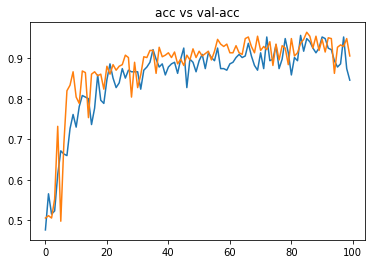

In [22]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

plt.title("acc vs val-acc")
plt.show()

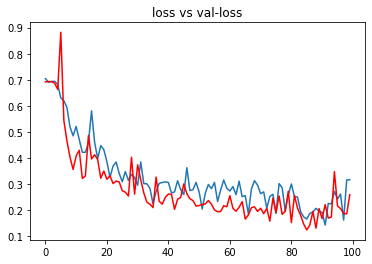

In [23]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'], c= "red")

plt.title("loss vs val-loss")
plt.show()

In [24]:
  # model accuracy

from keras.models import load_model

model = load_model("C:\\Users\\yuvra\\pyton project\\Untitled Folder\\THUMPSmodel.h5")

In [25]:
acc = model.evaluate_generator(test_data)[1]

print(f"the accuracy of our model is {acc*100} % ")

the accuracy of our model is 93.52381229400635 % 


In [26]:
from keras.preprocessing.image import load_img, img_to_array

In [27]:
path="F:\\New Dataset - Copy\\val\\TB\\CHNCXR_0379_1.png"

img = load_img(path, target_size = (50,50))
input_arr = img_to_array(img)/255

input_arr.shape


(50, 50, 3)

In [28]:
input_arr = np.expand_dims(input_arr, axis= 0 )

In [29]:
pred1=(model.predict(input_arr))
a= 1-pred1

if (a<pred1):
  print("the image is infected")
else:
  print("the image is healthy")

the image is infected


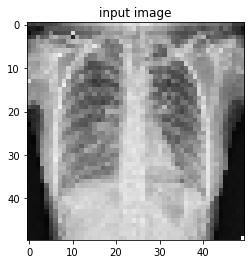

In [30]:
  # to display image

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()


In [31]:
print (pred1)
print("pred is ",pred1)
a= 1-pred1

if (a<pred1):
  print("the image is infected")
else:
  print("the image is healthy")

[[0.9306657]]
pred is  [[0.9306657]]
the image is infected


In [32]:
os.chdir("F:\\New Dataset - Copy\\Test\\TB\\")

In [33]:
arr=[]
path1=os.listdir()
path1=(path1)
l=len(path1)
print(path1[2])


CHNCXR_0336_1 - Copy.png


In [34]:
for i in range(0,l):
    path="F:\\New Dataset - Copy\\Test\\TB\\"+path1[i]

    img = load_img(path, target_size = (50,50))
    input_arr = img_to_array(img)/255

    input_arr.shape
    input_arr = np.expand_dims(input_arr, axis= 0 )
    
    pred1=(model.predict(input_arr))
    a= 1-pred1

    if (a<pred1):
      print("Infected")
    else:
      print("Healthy")

    i+1

Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Healthy
Healthy
Healthy
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Healthy
Healthy
Healthy
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Healthy
Healthy
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Healthy
Healthy
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Infected
Healthy
Healthy
Infected
Infected
Infected
Infected
Infe

In [35]:
os.chdir("F:\\New Dataset - Copy\\Test\\Normal\\")

In [36]:
arr=[]
path1=os.listdir()
path1=(path1)
l=len(path1)
print(path1[2])


Normal-1010.png


In [37]:
for i in range(0,l):
    path="F:\\New Dataset - Copy\\Test\\Normal\\"+path1[i]

    img = load_img(path, target_size = (50,50))
    input_arr = img_to_array(img)/255

    input_arr.shape
    input_arr = np.expand_dims(input_arr, axis= 0 )
    
    pred1=(model.predict(input_arr))
    a= 1-pred1

    if (a<pred1):
      print("Infected")
    else:
      print("Healthy")

    i+1

Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Infected
Healthy
Healthy
Healthy
Healthy
Healthy
Healthy
Infected
Health

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report

In [42]:
Model_pred=pd.read_excel("C:\\Users\\yuvra\\Documents\\222 proposed model2 100 epoch.xlsx")

In [43]:
confusion_M1 = pd.crosstab(Model_pred.PREDICTION_CLASS,Model_pred.ACTUAL_CLASS)

Text(0.5, 1.0, 'Model1')

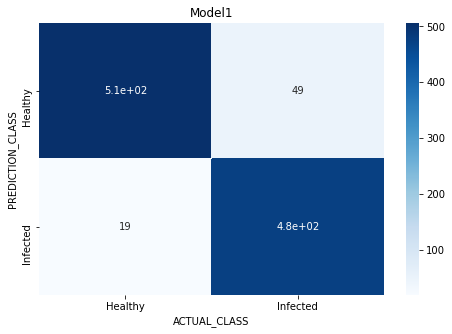

In [44]:
fig = plt.figure(figsize=(17,5))
ax1 = plt.subplot(121)
sn.heatmap(confusion_M1,annot=True,cmap='Blues')
ax1.set_title("Model1")

In [45]:
for i in range(confusion_M1.shape[0]):
    TP = confusion_M1.iloc[i,i]
    FP = confusion_M1.iloc[i,:].sum()-TP
    FN = confusion_M1.iloc[:,i].sum()-TP
    TN=confusion_M1.sum().sum()-TP-FP-FN
    Accuracy =(TP+TN)/confusion_M1.sum().sum()
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1_Score =(2 * Precision * Recall)/(Precision+Recall)
    
    print(confusion_M1.index[i],Accuracy,Precision,Recall,F1_Score)

Healthy 0.9352380952380952 0.9117117117117117 0.9638095238095238 0.9370370370370371
Infected 0.9352380952380952 0.9616161616161616 0.9066666666666666 0.9333333333333332
